In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

# Show 2 decimals
pd.set_option('display.float_format', lambda x: '%.0f' % x)
#pd.options.display.float_format = '{:,.2f}'.format

#Butun kolon ve satirlari gormek icin
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set plot background
sns.set_theme(style="whitegrid")

# Euro sign €
#print ("%s"%(u"\N{euro sign}"))

In [2]:
auto = pd.read_csv("/Users/macbook/Desktop/csv_dosyalari/autoscout_data_2000.csv")
df = auto.copy()
df.head(2)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",https://www.autoscout24.com/offers/audi-a3-2-0...,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n","110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,None,05/2022,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n","\n,Super 95,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,"HEERLEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n","92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\n809725,"\n,None,\n","[['\n'], ['']]",10/2013,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n","\n,Gasoline,\n","['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"


In [3]:
# Drop Duplicated Columns and Url column
df.drop(['url', 'Mileage', 'Power', 'gearbox'], axis=1, inplace= True)

df.columns

Index(['location', 'make', 'model', 'short_description', 'price', 'mileage',
       'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'country_version', 'offer_number',
       'warranty', 'first_registration', 'production_date',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'previous_owner', 'last_timing_belt_change',
       'Gearbox', 'engine_size', 'gears', 'cylinders', 'empty_weight',
       'Fuel_type', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'emissions_sticker', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras',
       '\ncolour', '\nmanufacturer_color', '\npaint', ' upholstery_colour ',
       ' upholstery '],
      dtype='object')

# Cleansing 

In [4]:
# 1 - Rename and Reassign Columns (move unwanted characters from column names)
df.columns = ['location', 'make', 'model', 'short_description', 'price','mileage_km', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version','offer_number', 'warranty_months',  'first_registration',
       'production_date', 'general_inspection', 'last_service','full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears','cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker','Comfort & Convenience', 'Entertainment & Media',
       'Safety & Security', 'extras', 'colour', 'manufacturer_color','paint', 'upholstery_colour', 'upholstery']

In [5]:
# 2 - Removing unwanted Chracters from data
# Except these colums ====> location, short_description, registration, first_registration, general_inspection, Comfort & Convenience, Entertainment & Media, Safety & Security, extras
clmns = ['make', 'model', 'price','mileage_km', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version','offer_number', 'warranty_months',
       'production_date', 'last_service','full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears','cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker',
       'colour', 'manufacturer_color','paint', 'upholstery_colour', 'upholstery']

for column in clmns:
    df[column] = df[column].str.replace(r'\W', '')
    
df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,n4450n,191066km,08/2003,Gasoline,110kW150hp,nDealern,Compact,Used,Front,5,3,CountryversionNone,SJ112R,6months,08/2003,None,05/2022,None,Yes,None,nNone,nNone,Automatic,1984cc,None,4,1280kg,Super95,None,nn,Euro4,None,"[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],4Grey,None,paintMetallic,upholsteryBlack,8Cloth
1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,n12950n,94758km,10/2013,Gasoline,92kW125hp,nDealern,Compact,Used,Front,5,5,CountryversionNone,809725,None,10/2013,None,None,None,Yes,None,nNone,nNone,Automatic,1395cc,None,4,1200kg,Gasoline,n49l100kmcombn,None,None,None,"[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]",4White,None,None,upholsteryBlack,8Cloth


In [6]:
# 3 - Delete NL from Location
df.location = df['location'].str.replace(', NL', '').str.upper()
df.location = df['location'].str.replace('.', '').str.replace('5', '').str.replace('6', '').str.replace(r'\+318429897', '')
df.location = df.location.replace('', np.NaN)

# Delete n from columns
L01 = ['seller', 'price', 'previous_owner', 'last_timing_belt_change', 'fuel_consumption', 'co2_emissions_g_km_comb']
for i in L01:
    df[i] = df[i].str.replace('n', '')

# Model nNonen to np.NaN
df.model = df.model.str.replace('nNonen', '').replace('', np.NaN)

# Delete [ ] from L02    
L02 = ['Comfort & Convenience', 'Entertainment & Media', 'Safety & Security', 'extras']
for i in L02:
    df[i] = df[i].str.replace('[', '')
    df[i] = df[i].str.replace(']', '')
    
# delete 4 from colour
df['colour'] = df['colour'].str.replace('4', '')

# Delete paint from paint column
df['paint'] = df['paint'].str.replace('paint', '')

# Delete upholstery from upholstery_colour
df['upholstery_colour'] = df['upholstery_colour'].str.replace('upholstery', '')

# Delete 8 from upholstery
df['upholstery'] = df['upholstery'].str.replace('8', '')

df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066km,08/2003,Gasoline,110kW150hp,Dealer,Compact,Used,Front,5,3,CountryversionNone,SJ112R,6months,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984cc,None,4,1280kg,Super95,Noe,,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth
1,HEERLEN,Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758km,10/2013,Gasoline,92kW125hp,Dealer,Compact,Used,Front,5,5,CountryversionNone,809725,None,10/2013,None,None,None,Yes,None,Noe,Noe,Automatic,1395cc,None,4,1200kg,Gasoline,49l100kmcomb,Noe,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth


In [7]:
df['mileage_km'] = df['mileage_km'].str.replace('km', '')
df['warranty_months'] = df['warranty_months'].str.replace('months', '')
df['engine_size_cc'] = df['engine_size_cc'].str.replace('cc', '')
df['empty_weight_kg'] = df['empty_weight_kg'].str.replace('kg', '')
df['country_version'] = df['country_version'].str.replace('Countryversion', '')
df['co2_emissions_g_km_comb'] = df['co2_emissions_g_km_comb'].str.replace('gkmcomb', '')
df.head(1)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,08/2003,Gasoline,110kW150hp,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth


In [8]:
df1 = df.copy()

L03 = ['price', 'mileage_km','engine_size_cc', 'empty_weight_kg', 'seats', 'doors', 'warranty_months', 'cylinders', 'co2_emissions_g_km_comb']
for i in L03:
    df[i] = df[i].replace(['None', 'Noe', 'Yes', 'Automatic', 'Manual', 'Semiautomatic'], np.NaN)
    df[i] = df[i].replace('', np.NaN)
    df[i] = df[i].astype(float)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,69534,24369,468620,1,8945,17450,28935,123456789
mileage_km,70951,107148,88475,1,30194,95615,163794,2215714
seats,65562,5,1,1,5,5,5,14
doors,69790,5,1,1,4,5,5,6
warranty_months,24004,8,9,1,6,6,6,84
engine_size_cc,65265,1771,702,0,1390,1598,1995,65535
cylinders,64809,4,1,1,4,4,4,12
empty_weight_kg,69500,1433,321,1,1234,1382,1591,4200
co2_emissions_g_km_comb,52190,129,68,0,105,133,164,5900


In [9]:
L04 = ['power_kw', 'power_hp']
df[L04] = df.power.str.split('kW', expand= True)   
df['power_hp'] = df['power_hp'].str.replace('hp', '').replace('None', np.NaN) 
df['power_kw'] = df['power_kw'].str.replace('kg', '').replace('None', np.NaN)     
df[L04] = df[L04].astype(float)
df = df.drop(['power'], axis=1)
df.head(1)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,08/2003,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150


# Dulpicated

In [10]:
df.shape

(71104, 46)

In [11]:
df.duplicated().sum()

2012

In [12]:
df.loc[df.duplicated(), :].head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
638,WOMMELS,Audi,A3,1.6 FSI Ambiente,2750,289500,11/2006,Gasoline,Privateseller,Compact,Used,None,5,4,None,None,NaN,11/2006,None,06/2022,None,Yes,None,Noe,Noe,Manual,1598,6,4,1240,Gasoline,67l100kmcomb89l100kmcity54l100kmcoutry,161,Euro4,None,"'Air conditioning', 'Automatic climate control...","'Hands-free equipment', 'On-board computer', '...","'Central door lock', 'Central door lock with r...","'Alloy wheels (16"")', 'Automatically dimming i...",Blue,None,None,None,None,85,116
1199,NAARDEN,Audi,TTS,Roadster 2.0 TFSI quattro Hoofdruimteverwarmin...,49900,5076,10/2017,Gasoline,Dealer,Convertible,Used,4WD,2,2,None,PV399Z,6,10/2017,None,New,None,Yes,None,Noe,Noe,Automatic,1984,6,4,1445,Super95,69l100kmcomb84l100kmcity6l100kmcoutry,159,Euro6,None,"'Air conditioning', 'Cruise control', 'Electri...","'Digital cockpit', 'Hands-free equipment', 'Ra...","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (18"")', 'Automatically dimming i...",Black,None,Metallic,Black,Fullleather,228,310


In [13]:
print(df.shape)
df.drop_duplicates(inplace= True)

(71104, 46)


In [14]:
df.shape

(69092, 46)

In [15]:
df.duplicated().sum()

0

### Price Null DataFrame

In [16]:
# Find the rows which have no price

price_null_tf = (df['price'].isnull())
price_null = (df[price_null_tf])
price_null.shape

(1523, 46)

### Drop Empty Price, Make , Year Columns

In [17]:
df.shape

(69092, 46)

In [18]:
#df[['price', 'make', 

In [19]:
df.dropna(subset=['price'], inplace= True)
df.shape

(67569, 46)

## DF_Dates 

In [20]:
L05 = ['registration', 'first_registration', 'general_inspection']
for i in L05:
    df[i] = pd.to_datetime(df[i], format= '%m/%Y', errors= 'coerce')

df['production_date'] = pd.to_datetime(df['production_date'], format= '%Y', errors= 'coerce')

# Creating new Features df_dates
df_dates = pd.DataFrame({'registration':  df.registration,
                         'first_registration' : df.first_registration,
                         'production_date' : df.production_date,
                         'general_inspection' : df.general_inspection,
                        'last_timing_belt_change' : df.last_timing_belt_change})

L05 = ['registration', 'first_registration', 'general_inspection']
for i in L05:
    df_dates[i] = pd.to_datetime(df_dates[i], format= '%m/%Y', errors= 'coerce')

df_dates['production_date'] = pd.to_datetime(df_dates['production_date'], format= '%Y', errors= 'coerce')
df_dates['last_timing_belt_change'] = pd.to_datetime(df_dates['last_timing_belt_change'], format= '%m%Y', errors= 'coerce')
df_dates.head()

,registration,first_registration,production_date,general_inspection,last_timing_belt_change
0,2003-08-01,2003-08-01,NaT,2022-05-01,NaT
1,2013-10-01,2013-10-01,NaT,NaT,NaT
2,2013-05-01,2013-05-01,NaT,2022-03-01,NaT
3,2015-06-01,2015-06-01,2015-01-01,NaT,NaT
4,2015-10-01,2015-10-01,NaT,NaT,NaT


In [21]:
df2 = df.copy()

In [22]:
# Add year Column !!!!!!
pd.options.display.float_format = '{:.0f}'.format 
df.insert(4, 'year', df.registration.dt.year, True )
df.insert(3, 'make_model', (df['make'].astype(str) +"-"+ df["model"].astype(str)), True)
df.head(2)

,location,make,model,make_model,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,Audi-A3,2.0 FSI Ambition Pro Line,2003,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150
1,HEERLEN,Audi,A3,Audi-A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,2013,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125


### Combine Make Column to Make_Counrty Column

In [23]:
german = ['Audi', 'MercedesBenz', 'BMW', 'Volkswagen', 'Opel', 'Skoda']
japan = ['Toyota', 'Honda', 'Mazda']
sweden = ['Volvo']
france = ['Renault', 'Peugeot', 'Citroen']
america = ['Ford', 'Chevrolet', 'Tesla']
south_korea = ['Kia', 'Hyundai']
italy = ['Fiat']
romanian = ['Dacia']

conditions = [ 
    (df.make.isin(german)),
    (df.make.isin(japan)),
    (df.make.isin(sweden)),
    (df.make.isin(france)),
    (df.make.isin(america)),
    (df.make.isin(south_korea)),
    (df.make.isin(italy)),
    (df.make.isin(romanian)),
]

values = ['German', 'Japan', 'Sweden', 'France', 'America', 'South_Korea', 'Italy', 'Romanian']

df['make_country'] = np.select(conditions, values)
df.tail(1)

,location,make,model,make_model,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
71103,SOESTERBERG,Volvo,S60,Volvo-S60,"2.4 Airco, Cruise Control, Stuurbekrachtiging",2001,944,404758,2001-09-01,LPG,Dealer,Sedan,Used,Front,5,4,None,26HNLS,NaN,2001-09-01,NaT,NaT,None,None,None,Noe,Noe,Manual,2435,5,5,1488,LiquidpetroleumgasLPG,84l100kmcomb116l100kmcity65l100kmcoutry,207,Euro3,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,None,Partleather,104,141,Sweden


In [24]:
df.price.isnull().sum()

0

# Wrong Values to NaN

In [25]:
# Year 2025 and 2028 to np.nan
df['year'] = df['year'].replace([2025, 2028], np.NaN)
df.insert(4, 'age', (2022 - df.year), True)
df.head(2)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,LOON OP ZAND,Audi,A3,Audi-A3,19,2.0 FSI Ambition Pro Line,2003,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150,German
1,HEERLEN,Audi,A3,Audi-A3,9,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,2013,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125,German


# PRICE (Last One)

In [26]:
# Wrong Price to NaN

# high price to NaN
#index_list = [1406, 22706, 23072, 66537, 71027]
#df.loc[index_list, 'price'] = np.NaN

# low price to NaN


print(df.price.max())
df.price.isnull().sum()

123456789.0


0

In [27]:
list_short = ['make', 'model', 'price', 'year','age','mileage_km']
df.loc[(df.price <=500) & (df.mileage_km <=100000) , list_short]

,make,model,price,year,age,mileage_km
14588,Ford,KaKa,499,2001,21,31949
17729,Ford,Transit,275,2017,5,77521
50269,Kia,Picanto,239,2022,0,10
52116,Kia,eNiro,464,2022,0,10
52122,Kia,eNiro,484,2022,0,10


In [28]:
df.loc[(df.price <=5000) & (df.mileage_km <=10000) , list_short]

,make,model,price,year,age,mileage_km
9896,BMW,116,4500,2006,16,186
23050,MercedesBenz,Vito,4700,2007,15,250
23882,MercedesBenz,300,2700,2000,22,3000
32155,Volkswagen,Golf,4900,2010,12,1
32160,Volkswagen,Polo,4900,2010,12,1
50269,Kia,Picanto,239,2022,0,10
52113,Kia,EV6,579,2021,1,10
52116,Kia,eNiro,464,2022,0,10
52118,Kia,eNiro,539,2022,0,10
52122,Kia,eNiro,484,2022,0,10


# Missing Value Make

### Make, Model, Mileage_Km

In [107]:
df.loc[(df.model.isnull()) & (df.year.isnull()) & (df.mileage_km.isnull())].shape

(0, 50)

In [109]:
df.loc[(df.model.isnull()) & (df.year.isnull())].shape

(8, 50)

In [110]:
df.loc[(df.model.isnull()) & (df.mileage_km.isnull())].shape

(0, 50)

In [111]:
df.loc[(df.year.isnull()) & (df.mileage_km.isnull())].shape

(5, 50)

In [112]:
df[['model', 'year', 'mileage_km']].isnull().sum()

model           8
year           48
mileage_km    150
dtype: int64

In [120]:
print(df.shape)
df.dropna(subset=['model', 'year','mileage_km'], inplace= True)
df.shape  # 193 index Deleted

(67569, 50)


(67376, 50)

# Save

In [122]:
df.to_csv('auto_02.csv')

# DF_Mercedes_Bmw

In [145]:
L01 = ['MercedesBenz', 'BMW']
df_mer_bmw = df.loc[df.make.isin(L01), :]
df_mer_bmw.to_csv('df_mer_bmw.csv')
df_mer_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13956 entries, 6394 to 25486
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 13955 non-null  object        
 1   make                     13956 non-null  object        
 2   model                    13956 non-null  object        
 3   make_model               13956 non-null  object        
 4   age                      13956 non-null  float64       
 5   short_description        13872 non-null  object        
 6   year                     13956 non-null  float64       
 7   price                    13956 non-null  float64       
 8   mileage_km               13956 non-null  float64       
 9   registration             13956 non-null  datetime64[ns]
 10  fuel_type                13956 non-null  object        
 11  seller                   13956 non-null  object        
 12  body_type                1395

In [161]:
df_mer_bmw.make_model.value_counts().sort_values().head()

MercedesBenz-S300     1
MercedesBenz-220      1
MercedesBenz-E420     1
MercedesBenz-S250     1
MercedesBenz-CE220    1
Name: make_model, dtype: int64

# ML (MERCEDES_BMW)

In [ ]:
# Drop the Values smaller than 30 

In [269]:
df_mer_bmw = pd.read_csv('df_mer_bmw.csv')
df_mer_bmw.drop('Unnamed: 0', axis=1, inplace=True)

In [271]:
small_30_tf = (df_mer_bmw.make_model.value_counts() < 30)
small_30_tf[small_30_tf][:5]

BMW-645              True
BMW-430              True
BMW-X4               True
MercedesBenz-A220    True
BMW-135              True
Name: make_model, dtype: bool

In [272]:
list(small_30_tf[:5].index)

['BMW-320', 'BMW-X5', 'MercedesBenz-C180', 'BMW-218', 'BMW-330']

In [273]:
index_criteria = small_30_tf[small_30_tf].index[:10]

In [274]:
small_30_tf[small_30_tf].shape

(203,)

In [275]:
filt = df['make_model'].isin(list(small_30_tf[small_30_tf].index))
df.loc[filt].index

Int64Index([], dtype='int64')

In [276]:
# All steps in one code line
small_30_tf = (df_mer_bmw.make_model.value_counts() < 30)

index_criteria = small_30_tf[small_30_tf].index

list_criteria = list(index_criteria)

criteria = df_mer_bmw['make_model'].map(lambda x :  x in list_criteria) # criteria = df.make_model.isin(list_criteria)

df_mer_bmw[criteria].index

Int64Index([    5,     6,    16,   115,   147,   185,   191,   193,   202,
              204,
            ...
            13718, 13720, 13770, 13775, 13788, 13797, 13923, 13936, 13945,
            13952],
           dtype='int64', length=1561)

In [277]:
df_mer_bmw.shape

(13956, 50)

In [278]:
# Drop less than 30 Values in DF

df_mer_bmw.drop(index= (df_mer_bmw[criteria].index), inplace= True)
df_mer_bmw.shape

(12395, 50)

In [279]:
df = df_mer_bmw.copy()

### Drop The Values Model == Others

In [280]:
df.loc[df.model == 'Others', :].index
df.drop(index= (df.loc[df.model == 'Others', :].index), inplace= True)
df.shape

(12135, 50)

### Make Co2 Column np.NaN while the Fueltype = L01

In [470]:
L01= ['Gasoline', 'Diesel', 'ElectricGasoline', 'ElectricDiesel', 'LPG', 'CNG', 'Others']
index_01 = df.loc[(df.fuel_type.isin(L01)) & (df.co2_emissions_g_km_comb == 0), ['make_model', 'fuel_type', 'co2_emissions_g_km_comb']].index
index_01

Int64Index([   13,    18,   146,   156,   172,   330,   491,   551,   557,
              564,
            ...
            13903, 13904, 13905, 13906, 13907, 13909, 13911, 13915, 13918,
            13922],
           dtype='int64', length=1086)

In [473]:
df.co2_emissions_g_km_comb.loc[index_01] = np.NaN
df.co2_emissions_g_km_comb.loc[index_01][:5]

13    NaN
18    NaN
146   NaN
156   NaN
172   NaN
Name: co2_emissions_g_km_comb, dtype: float64

In [350]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12135,8,6,0,4,7,12,25
year,12135,2014,6,1997,2010,2015,2018,2022
price,12135,27472,23640,600,11250,20485,34900,179659
mileage_km,12135,120935,90720,1,47010,112017,178251,827190
seats,11405,5,1,2,5,5,5,9
doors,11900,4,1,2,4,5,5,6
warranty_months,3204,9,8,1,6,6,6,24
engine_size_cc,11266,2049,585,0,1595,1995,2143,5462
cylinders,11168,4,1,1,4,4,4,8
empty_weight_kg,11801,1572,308,112,1335,1480,1720,3960


### Engine Size Control
### np.NaN wich engine size > 6000 

In [328]:
df.engine_size_cc.value_counts().sort_index(ascending= False).head()

65535    1
8592     3
5462     1
5461     2
5000     1
Name: engine_size_cc, dtype: int64

In [333]:
L01 = df.loc[df.engine_size_cc > 6000].index
L01

Int64Index([11711, 11893, 12012, 12708], dtype='int64')

In [349]:
df.engine_size_cc.loc[L01] = np.NaN

df.engine_size_cc.loc[L01]

11711   NaN
11893   NaN
12012   NaN
12708   NaN
Name: engine_size_cc, dtype: float64

### Mileage Control

In [368]:
df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year', 'mileage_km']]

,make_model,year,mileage_km
792,BMW-640,2011,1
3343,BMW-116,2006,186
3493,BMW-M3,2017,345
4335,BMW-116,2014,1
4732,BMW-X3,2012,1
5086,BMW-525,2005,328
5582,BMW-525,2010,1
5585,BMW-520,2013,1
9517,MercedesBenz-C180,2008,1
11608,MercedesBenz-Vito,2007,250


In [372]:
df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year']].values

array([['BMW-640', 2011.0],
       ['BMW-116', 2006.0],
       ['BMW-M3', 2017.0],
       ['BMW-116', 2014.0],
       ['BMW-X3', 2012.0],
       ['BMW-525', 2005.0],
       ['BMW-525', 2010.0],
       ['BMW-520', 2013.0],
       ['MercedesBenz-C180', 2008.0],
       ['MercedesBenz-Vito', 2007.0],
       ['MercedesBenz-E300', 2011.0],
       ['MercedesBenz-E200', 2015.0],
       ['MercedesBenz-E200', 2010.0]], dtype=object)

### Assign df.mliege_km to MEAN  less than 2500 km and year 2020

In [385]:
index_01 = df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year']].index
index_01

Int64Index([792, 3343, 3493, 4335, 4732, 5086, 5582, 5585, 9517, 11608, 11706,
            11827, 12094],
           dtype='int64')

In [392]:
for i in index_01:
    mm = df.loc[i][3]
    yy = df.loc[i][6]
    mileage_mean = df.loc[(df.make_model == (df.loc[792][3])) & (df.year == (df.loc[792][6]))].mileage_km.mean()
    df.mileage_km.loc[i] = int(mileage_mean)
    print(mm, int(yy), int(mileage_mean))

BMW-640 2011 132658
BMW-116 2006 144718
BMW-M3 2017 144718
BMW-116 2014 144718
BMW-X3 2012 144718
BMW-525 2005 144718
BMW-525 2010 144718
BMW-520 2013 144718
MercedesBenz-C180 2008 144718
MercedesBenz-Vito 2007 144718
MercedesBenz-E300 2011 144718
MercedesBenz-E200 2015 144718
MercedesBenz-E200 2010 144718


In [398]:
df.loc[index_01, ['mileage_km']][:3]

,mileage_km
792,132658
3343,144718
3493,144718


### Control Doors

In [399]:
df.doors.value_counts()

5    7447
4    2746
2    1499
3     202
6       6
Name: doors, dtype: int64

In [402]:
df.loc[df.doors == 6]

Int64Index([6450, 10428], dtype='int64')

In [404]:
df.doors.loc[df.loc[df.doors == 6].index[:2]]

6450    6
10428   6
Name: doors, dtype: float64

In [408]:
# Assign 5 to doors two model of cars X3, C300
df.doors.loc[df.loc[df.doors == 6].index[:2]] = 5
df.loc[[6450, 10428]]

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
6450,AMSTERDAM DUIVENDRECHT,BMW,X3,BMW-X3,1,Xdrive30e,2021,67900,6774,2021-09-01,ElectricGasoline,Dealer,OffRoadPickup,Used,None,NaN,5,None,9H75423,24,2021-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,NaN,8,NaN,NaN,Super95,Noe,0,None,None,"'Air conditioning', 'Automatic climate control...","'Digital cockpit', 'Digital radio', 'Radio', '...","'Adaptive headlights', 'Alarm system', 'Emerge...","'Automatically dimming interior mirror', 'Emer...",Grey,None,Metallic,Other,Partleather,NaN,NaN,German
10428,SPAUBEEK,MercedesBenz,C300,MercedesBenz-C300,7,C300 4MATIC,2015,29900,55460,2015-07-01,Gasoline,Dealer,Other,Used,4WD,NaN,5,Netherlands,2578099,6,2015-07-01,2015-01-01,2023-09-01,None,None,Yes,Noe,Noe,Automatic,1991,None,NaN,1780,Gasoline,0l100kmcomb0l100kmcity0l100kmcoutry,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...",'CD player',"'ABS', 'Central door lock', 'Central door lock...",'Alloy wheels',Black,None,None,None,Fullleather,180,245,German


### Control Seats

In [409]:
df.seats.value_counts()

5    9099
4    1486
2     498
3     144
7     129
6      22
9      17
8      10
Name: seats, dtype: int64

In [421]:
# Check From internet All is ok
df.loc[(df.seats == 7) & (df.doors < 5), ['make_model', 'year', 'seats', 'doors']]

,make_model,year,seats,doors
3733,BMW-218,2021,7,4
3758,BMW-218,2019,7,4
3859,BMW-220,2016,7,4
9404,MercedesBenz-E350,2011,7,4
9547,MercedesBenz-ML320,2002,7,4
12521,MercedesBenz-Sprinter,2016,7,4
12576,MercedesBenz-Sprinter,2008,7,4
12768,MercedesBenz-Sprinter,2014,7,4
12998,MercedesBenz-Vito,2021,7,4


In [422]:
df.head(2)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,APLHEN AAN DEN RIJN,BMW,316,BMW-316,21,Compact 316ti Executive,2001,1450,231339,2001-09-01,Gasoline,Dealer,Compact,Used,Rear,5,3,None,28HPDP,NaN,2001-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,1796,5,4,1295,Gasoline,Noe,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Sport suspension',Blue,None,Metallic,None,Cloth,85,116,German
1,ZWOLLE,BMW,320,BMW-320,6,"Gran Turismo 320i Centennial Executive, Automaat,",2016,22490,105267,2016-06-01,Gasoline,Dealer,Compact,Used,Rear,5,5,None,JV357R,6,2016-06-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,1997,None,NaN,1535,Gasoline,Noe,NaN,Euro6,None,"'Armrest', 'Cruise control', 'Electric tailgat...","'CD player', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")'",Black,None,None,Black,Cloth,133,181,German


## Control Fuel Type 

In [425]:
df.loc[df.fuel_type == 'Others']

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
5692,ARNHEM,BMW,520,BMW-520,14,5er Aut.,2008,7000,226600,2008-06-01,Others,Privateseller,Sedan,Used,None,5,4,None,None,NaN,2008-06-01,NaN,2021-12-01,None,Yes,Yes,Noe,122021,Automatic,1995,6,4,1490,Others,69l100kmcomb94l100kmcity54l100kmcoutry,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'Bluetooth', 'CD player', 'MP3', 'On-board com...","'ABS', 'Bi-Xenon headlights', 'Central door lo...","'Alloy wheels', 'Emergency tyre'",Black,None,None,None,None,125,170,German


In [431]:
df.loc[(df.make_model =='BMW-520') & (df.year == 2008) & (df.engine_size_cc == 1995)& (df.mileage_km > 200000)].fuel_type

2467    Gasoline
3428    Gasoline
3586    Gasoline
5074      Diesel
5255      Diesel
5274      Diesel
5598      Diesel
5692      Others
Name: fuel_type, dtype: object

In [432]:
# Assign Diesel to Others
df.fuel_type.loc[5692] = 'Diesel'
df.loc[5692].fuel_type

'Diesel'

In [454]:
df.make_model.value_counts().shape

(89,)

In [475]:
df.fuel_type.value_counts()

Gasoline            6566
Diesel              2857
ElectricGasoline    1813
Electric             774
ElectricDiesel        90
LPG                   33
CNG                    2
Name: fuel_type, dtype: int64

In [476]:
pd.get_dummies(df, columns= ['fuel_type'] , prefix = ['fuelType']).head()

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country,fuelType_CNG,fuelType_Diesel,fuelType_Electric,fuelType_ElectricDiesel,fuelType_ElectricGasoline,fuelType_Gasoline,fuelType_LPG
0,APLHEN AAN DEN RIJN,BMW,316,BMW-316,21,Compact 316ti Executive,2001,1450,231339,2001-09-01,Dealer,Compact,Used,Rear,5,3,None,28HPDP,NaN,2001-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,1796,5,4,1295,Gasoline,Noe,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Sport suspension',Blue,None,Metallic,None,Cloth,85,116,German,0,0,0,0,0,1,0
1,ZWOLLE,BMW,320,BMW-320,6,"Gran Turismo 320i Centennial Executive, Automaat,",2016,22490,105267,2016-06-01,Dealer,Compact,Used,Rear,5,5,None,JV357R,6,2016-06-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,1997,None,NaN,1535,Gasoline,Noe,NaN,Euro6,None,"'Armrest', 'Cruise control', 'Electric tailgat...","'CD player', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")'",Black,None,None,Black,Cloth,133,181,German,0,0,0,0,0,1,0
2,UDEN,BMW,116,BMW-116,8,"116I 136pk Executive,1e Eig,Leer,Xenon,Navi,Ai...",2014,15999,70491,2014-10-01,Dealer,Compact,Used,None,5,5,Netherlands,2616626,NaN,2014-10-01,2014-01-01,2022-10-01,None,Yes,Yes,Noe,Noe,Automatic,1598,None,4,1195,Gasoline,56l100kmcomb0l100kmcity0l100kmcoutry,129,None,None,"'Air conditioning', 'Armrest', 'Cruise control...","'Bluetooth', 'CD player', 'MP3', 'On-board com...","'ABS', 'Alarm system', 'Central door lock with...","'Alloy wheels (16"")'",Grey,None,Metallic,None,Fullleather,100,136,German,0,0,0,0,0,1,0
3,ROTTERDAM,BMW,120,BMW-120,18,120i High Executive Automaat,2004,2790,342421,2004-11-01,Dealer,Compact,Used,None,NaN,5,Netherlands,31PTGG,NaN,2004-11-01,2004-01-01,2021-12-01,None,None,None,Noe,Noe,Automatic,1995,5,4,1250,SuperE1095,Noe,NaN,nn,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'On-board computer', 'Radio', 'Sound system'","'ABS', 'Central door lock', 'Driver-side airba...",'Alloy wheels',Blue,None,Metallic,None,Cloth,110,150,German,0,0,0,0,0,1,0
4,PUTTEN,BMW,435,BMW-435,7,Gran Coupé 435i xDrive M-Sport pakket | Navig ...,2015,35300,63507,2015-06-01,Dealer,Compact,Used,4WD,5,5,None,GH120P,NaN,2015-06-01,NaN,NaN,None,Yes,None,Noe,Noe,Automatic,2979,8,6,1625,Super95,79l100kmcomb113l100kmcity59l100kmcoutry,184,Euro6,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")', 'Automatically dimming i...",Black,None,Metallic,Black,Fullleather,225,306,German,0,0,0,0,0,1,0


# Get Dummies

## Get Dummies fuel Type

In [489]:
pd.get_dummies(df, columns= ['fuel_type'] , prefix = ['fuelType']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,12135.0000,8.3161,5.5987,0.0000,4.0000,7.0000,12.0000,25.0000
year,12135.0000,2013.6839,5.5987,1997.0000,2010.0000,2015.0000,2018.0000,2022.0000
price,12135.0000,27472.0210,23640.2660,600.0000,11250.0000,20485.0000,34900.0000,179659.0000
mileage_km,12135.0000,121089.3735,90637.1912,1.0000,47219.5000,112219.0000,178251.0000,827190.0000
seats,11405.0000,4.7466,0.7672,2.0000,5.0000,5.0000,5.0000,9.0000
doors,11900.0000,4.3576,1.0099,2.0000,4.0000,5.0000,5.0000,6.0000
warranty_months,3204.0000,9.3171,7.5659,1.0000,6.0000,6.0000,6.0000,24.0000
engine_size_cc,11266.0000,2048.6955,585.2296,0.0000,1595.0000,1995.0000,2143.0000,5462.0000
cylinders,11168.0000,4.3349,0.9894,1.0000,4.0000,4.0000,4.0000,8.0000
empty_weight_kg,11801.0000,1571.6952,307.9156,112.0000,1335.0000,1480.0000,1720.0000,3960.0000


In [484]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.get_dummies(df, columns= ['fuel_type'] , prefix = ['fuelType']).corr()

,age,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp,fuelType_CNG,fuelType_Diesel,fuelType_Electric,fuelType_ElectricDiesel,fuelType_ElectricGasoline,fuelType_Gasoline,fuelType_LPG
age,1.0000,-1.0000,-0.7258,0.7399,-0.1938,-0.3505,-0.4734,0.3882,0.4393,-0.2764,0.7208,-0.0650,-0.0646,0.0062,0.0402,-0.3106,-0.0915,-0.3965,0.4083,0.0864
year,-1.0000,1.0000,0.7258,-0.7399,0.1938,0.3505,0.4734,-0.3882,-0.4393,0.2764,-0.7208,0.0650,0.0646,-0.0062,-0.0402,0.3106,0.0915,0.3965,-0.4083,-0.0864
price,-0.7258,0.7258,1.0000,-0.6834,0.0782,0.1849,0.5126,-0.0012,-0.0546,0.6233,-0.4300,0.4999,0.4995,-0.0076,-0.1671,0.4339,0.1585,0.4318,-0.4019,-0.0443
mileage_km,0.7399,-0.7399,-0.6834,1.0000,-0.0380,-0.1522,-0.4738,0.3210,0.3168,-0.1336,0.4581,-0.0753,-0.0749,0.0235,0.3676,-0.3139,-0.0773,-0.3405,0.0879,0.0897
seats,-0.1938,0.1938,0.0782,-0.0380,1.0000,0.5371,0.1068,-0.1933,-0.2101,0.0645,-0.2590,-0.0706,-0.0708,0.0216,0.0333,-0.0702,0.0293,0.1344,-0.0987,0.0164
doors,-0.3505,0.3505,0.1849,-0.1522,0.5371,1.0000,0.1102,-0.2414,-0.2360,0.1543,-0.2788,-0.1397,-0.1400,-0.0110,0.1056,0.1586,0.0311,0.1353,-0.2711,0.0071
warranty_months,-0.4734,0.4734,0.5126,-0.4738,0.1068,0.1102,1.0000,-0.1588,-0.0669,0.2376,-0.2364,0.1228,0.1227,NaN,-0.1753,0.1886,0.0457,0.2935,-0.2013,-0.0225
engine_size_cc,0.3882,-0.3882,-0.0012,0.3210,-0.1933,-0.2414,-0.1588,1.0000,0.8978,0.4870,0.5804,0.7028,0.7028,-0.0058,0.1840,-0.1021,-0.0059,-0.1110,-0.0780,0.0763
cylinders,0.4393,-0.4393,-0.0546,0.3168,-0.2101,-0.2360,-0.0669,0.8978,1.0000,0.3311,0.6318,0.6348,0.6345,-0.0045,0.1140,-0.1732,-0.0244,-0.1683,0.0428,0.0665
empty_weight_kg,-0.2764,0.2764,0.6233,-0.1336,0.0645,0.1543,0.2376,0.4870,0.3311,1.0000,0.0714,0.6186,0.6188,0.0713,0.1487,0.2719,0.1461,0.3463,-0.5367,0.0220


# Label Encoder

In [490]:
from sklearn.preprocessing import LabelEncoder

In [491]:
lbe = LabelEncoder()
lbe.fit_transform(df['fuel_type'])

array([5, 5, 5, ..., 6, 0, 0])

In [507]:
df['new_fuelType'] = lbe.fit_transform(df.fuel_type)
for i in df.fuel_type.value_counts().index:
    print(df.loc[df.fuel_type == i, ['fuel_type', 'new_fuelType']].head(1))

  fuel_type  new_fuelType
0  Gasoline             5
    fuel_type  new_fuelType
658    Diesel             1
             fuel_type  new_fuelType
6381  ElectricGasoline             4
     fuel_type  new_fuelType
5768  Electric             2
           fuel_type  new_fuelType
7469  ElectricDiesel             3
     fuel_type  new_fuelType
7486       LPG             6
      fuel_type  new_fuelType
13954       CNG             0


In [508]:
df3 = df.copy()

In [510]:
df.columns

Index(['location', 'make', 'model', 'make_model', 'age', 'short_description',
       'year', 'price', 'mileage_km', 'registration', 'fuel_type', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty_months', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears',
       'cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker',
       'Comfort & Convenience', 'Entertainment & Media', 'Safety & Security',
       'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour',
       'upholstery', 'power_kw', 'power_hp', 'make_country', 'new_fuelType'],
      dtype='object')

In [511]:
df[:].select_dtypes(include = ['float64', 'int64']).columns

Index(['age', 'year', 'price', 'mileage_km', 'seats', 'doors',
       'warranty_months', 'engine_size_cc', 'cylinders', 'empty_weight_kg',
       'co2_emissions_g_km_comb', 'power_kw', 'power_hp', 'new_fuelType'],
      dtype='object')

In [512]:
df_new = df.loc[:, ['make_model', 'fuel_type','age', 'year', 'price', 'mileage_km', 'seats', 'doors',
       'warranty_months', 'engine_size_cc', 'cylinders', 'empty_weight_kg',
       'co2_emissions_g_km_comb', 'power_kw', 'power_hp']]
df_new.head(2)

,make_model,fuel_type,age,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp
0,BMW-316,Gasoline,21.0000,2001.0000,1450.0000,231339.0000,5.0000,3.0000,NaN,1796.0000,4.0000,1295.0000,NaN,85.0000,116.0000
1,BMW-320,Gasoline,6.0000,2016.0000,22490.0000,105267.0000,5.0000,5.0000,6.0000,1997.0000,NaN,1535.0000,NaN,133.0000,181.0000


In [516]:
df = df_new.copy()

# Save Data

In [542]:
df.to_csv('df_15column.csv')

In [81]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df = pd.read_csv('df_15column.csv', index_col=[0], usecols=[0,1,2,4,5,6])

df.head(2)

,make_model,fuel_type,year,price,mileage_km
0,BMW-316,Gasoline,2001,1450,231339
1,BMW-320,Gasoline,2016,22490,105267


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12135,2014,6,1997,2010,2015,2018,2022
price,12135,27472,23640,600,11250,20485,34900,179659
mileage_km,12135,121089,90637,1,47220,112219,178251,827190


In [83]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df.corr()

,year,price,mileage_km
year,1.0000,0.7258,-0.7399
price,0.7258,1.0000,-0.6834
mileage_km,-0.7399,-0.6834,1.0000


In [84]:
df.isnull().sum()

make_model    0
fuel_type     0
year          0
price         0
mileage_km    0
dtype: int64

In [85]:
dms = pd.get_dummies(df[['make_model', 'fuel_type']], prefix='model')
dms.head(1)

,model_BMW-116,model_BMW-118,model_BMW-120,model_BMW-216,model_BMW-218,model_BMW-220,model_BMW-225,model_BMW-316,model_BMW-318,model_BMW-320,model_BMW-325,model_BMW-328,model_BMW-330,model_BMW-335,model_BMW-418,model_BMW-420,model_BMW-428,model_BMW-435,model_BMW-520,model_BMW-523,model_BMW-525,model_BMW-530,model_BMW-535,model_BMW-640,model_BMW-650,model_BMW-730,model_BMW-740,model_BMW-M3,model_BMW-M4,model_BMW-X1,model_BMW-X2,model_BMW-X3,model_BMW-X5,model_BMW-X6,model_BMW-Z3,model_BMW-Z4,model_BMW-i3,model_BMW-i4,model_BMW-iX,model_BMW-iX3,model_MercedesBenz-A150,model_MercedesBenz-A160,model_MercedesBenz-A170,model_MercedesBenz-A180,model_MercedesBenz-A200,model_MercedesBenz-A250,model_MercedesBenz-A45AMG,model_MercedesBenz-B160,model_MercedesBenz-B170,model_MercedesBenz-B180,model_MercedesBenz-B200,model_MercedesBenz-B250,model_MercedesBenz-C180,model_MercedesBenz-C200,model_MercedesBenz-C220,model_MercedesBenz-C250,model_MercedesBenz-C300,model_MercedesBenz-C350,model_MercedesBenz-CLA180,model_MercedesBenz-CLA200,model_MercedesBenz-CLA250,model_MercedesBenz-CLK200,model_MercedesBenz-CLS350,model_MercedesBenz-Citan,model_MercedesBenz-E200,model_MercedesBenz-E220,model_MercedesBenz-E240,model_MercedesBenz-E250,model_MercedesBenz-E300,model_MercedesBenz-E320,model_MercedesBenz-E350,model_MercedesBenz-EQC400,model_MercedesBenz-EQS,model_MercedesBenz-GLA180,model_MercedesBenz-GLA200,model_MercedesBenz-GLA250,model_MercedesBenz-GLA45AMG,model_MercedesBenz-GLC220,model_MercedesBenz-GLC250,model_MercedesBenz-GLC300,model_MercedesBenz-GLC350,model_MercedesBenz-GLE350,model_MercedesBenz-ML320,model_MercedesBenz-ML350,model_MercedesBenz-S350,model_MercedesBenz-SL500,model_MercedesBenz-SLK200,model_MercedesBenz-Sprinter,model_MercedesBenz-Vito,model_CNG,model_Diesel,model_Electric,model_ElectricDiesel,model_ElectricGasoline,model_Gasoline,model_LPG
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [86]:
dms.columns

Index(['model_BMW-116', 'model_BMW-118', 'model_BMW-120', 'model_BMW-216',
       'model_BMW-218', 'model_BMW-220', 'model_BMW-225', 'model_BMW-316',
       'model_BMW-318', 'model_BMW-320', 'model_BMW-325', 'model_BMW-328',
       'model_BMW-330', 'model_BMW-335', 'model_BMW-418', 'model_BMW-420',
       'model_BMW-428', 'model_BMW-435', 'model_BMW-520', 'model_BMW-523',
       'model_BMW-525', 'model_BMW-530', 'model_BMW-535', 'model_BMW-640',
       'model_BMW-650', 'model_BMW-730', 'model_BMW-740', 'model_BMW-M3',
       'model_BMW-M4', 'model_BMW-X1', 'model_BMW-X2', 'model_BMW-X3',
       'model_BMW-X5', 'model_BMW-X6', 'model_BMW-Z3', 'model_BMW-Z4',
       'model_BMW-i3', 'model_BMW-i4', 'model_BMW-iX', 'model_BMW-iX3',
       'model_MercedesBenz-A150', 'model_MercedesBenz-A160',
       'model_MercedesBenz-A170', 'model_MercedesBenz-A180',
       'model_MercedesBenz-A200', 'model_MercedesBenz-A250',
       'model_MercedesBenz-A45AMG', 'model_MercedesBenz-B160',
       'model_Me

In [87]:
list(dms.columns)[:5]

['model_BMW-116',
 'model_BMW-118',
 'model_BMW-120',
 'model_BMW-216',
 'model_BMW-218']

In [88]:
X_ = df.drop(['price','make_model', 'fuel_type'], axis='columns').astype('float64')
y = df.price
X = pd.concat([X_, dms[list(dms.columns)]], axis=1)

In [90]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
X.head(1)

,year,mileage_km,model_BMW-116,model_BMW-118,model_BMW-120,model_BMW-216,model_BMW-218,model_BMW-220,model_BMW-225,model_BMW-316,model_BMW-318,model_BMW-320,model_BMW-325,model_BMW-328,model_BMW-330,model_BMW-335,model_BMW-418,model_BMW-420,model_BMW-428,model_BMW-435,model_BMW-520,model_BMW-523,model_BMW-525,model_BMW-530,model_BMW-535,model_BMW-640,model_BMW-650,model_BMW-730,model_BMW-740,model_BMW-M3,model_BMW-M4,model_BMW-X1,model_BMW-X2,model_BMW-X3,model_BMW-X5,model_BMW-X6,model_BMW-Z3,model_BMW-Z4,model_BMW-i3,model_BMW-i4,model_BMW-iX,model_BMW-iX3,model_MercedesBenz-A150,model_MercedesBenz-A160,model_MercedesBenz-A170,model_MercedesBenz-A180,model_MercedesBenz-A200,model_MercedesBenz-A250,model_MercedesBenz-A45AMG,model_MercedesBenz-B160,model_MercedesBenz-B170,model_MercedesBenz-B180,model_MercedesBenz-B200,model_MercedesBenz-B250,model_MercedesBenz-C180,model_MercedesBenz-C200,model_MercedesBenz-C220,model_MercedesBenz-C250,model_MercedesBenz-C300,model_MercedesBenz-C350,model_MercedesBenz-CLA180,model_MercedesBenz-CLA200,model_MercedesBenz-CLA250,model_MercedesBenz-CLK200,model_MercedesBenz-CLS350,model_MercedesBenz-Citan,model_MercedesBenz-E200,model_MercedesBenz-E220,model_MercedesBenz-E240,model_MercedesBenz-E250,model_MercedesBenz-E300,model_MercedesBenz-E320,model_MercedesBenz-E350,model_MercedesBenz-EQC400,model_MercedesBenz-EQS,model_MercedesBenz-GLA180,model_MercedesBenz-GLA200,model_MercedesBenz-GLA250,model_MercedesBenz-GLA45AMG,model_MercedesBenz-GLC220,model_MercedesBenz-GLC250,model_MercedesBenz-GLC300,model_MercedesBenz-GLC350,model_MercedesBenz-GLE350,model_MercedesBenz-ML320,model_MercedesBenz-ML350,model_MercedesBenz-S350,model_MercedesBenz-SL500,model_MercedesBenz-SLK200,model_MercedesBenz-Sprinter,model_MercedesBenz-Vito,model_CNG,model_Diesel,model_Electric,model_ElectricDiesel,model_ElectricGasoline,model_Gasoline,model_LPG
0,2001,231339,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [91]:
X.shape

(12135, 98)

In [92]:
y.shape

(12135,)

# ML - KNeighborsRegressor

In [93]:
# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [95]:
# 1- Model kurma
# (n_neighbors = 5 default)
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print('1- n_neighbors =', knn_model.n_neighbors)

1- n_neighbors = 5


In [96]:
# 2- Tahmin
y_pred = knn_model.predict(X_test)
print('KNN test hata = ', np.sqrt(mean_squared_error(y_test, y_pred)))

KNN test hata =  13590.192487938093


In [97]:
# 3- Model Tuning
knn_params = {'n_neighbors': np.arange(1,20,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv= 5)
print('3- CV_Model : ', '\n',knn_cv_model.fit(X_train, y_train))
print('3- Optimum n_neighbors parametresi = ', knn_cv_model.best_params_['n_neighbors'])

3- CV_Model :  
 GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})
3- Optimum n_neighbors parametresi =  14


In [98]:
# 4- Final Model (Tuned Model)
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_['n_neighbors']).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print('4- KNN_CV test hata = ',np.sqrt(mean_squared_error(y_test, y_pred)))

4- KNN_CV test hata =  13381.018648033109


In [99]:
df.price.describe()

count    12135
mean     27472
std      23640
min        600
25%      11250
50%      20485
75%      34900
max     179659
Name: price, dtype: float64

In [100]:
X_deneme = X.loc[df.price > 150000]
X_deneme

,year,mileage_km,model_BMW-116,model_BMW-118,model_BMW-120,model_BMW-216,model_BMW-218,model_BMW-220,model_BMW-225,model_BMW-316,model_BMW-318,model_BMW-320,model_BMW-325,model_BMW-328,model_BMW-330,model_BMW-335,model_BMW-418,model_BMW-420,model_BMW-428,model_BMW-435,model_BMW-520,model_BMW-523,model_BMW-525,model_BMW-530,model_BMW-535,model_BMW-640,model_BMW-650,model_BMW-730,model_BMW-740,model_BMW-M3,model_BMW-M4,model_BMW-X1,model_BMW-X2,model_BMW-X3,model_BMW-X5,model_BMW-X6,model_BMW-Z3,model_BMW-Z4,model_BMW-i3,model_BMW-i4,model_BMW-iX,model_BMW-iX3,model_MercedesBenz-A150,model_MercedesBenz-A160,model_MercedesBenz-A170,model_MercedesBenz-A180,model_MercedesBenz-A200,model_MercedesBenz-A250,model_MercedesBenz-A45AMG,model_MercedesBenz-B160,model_MercedesBenz-B170,model_MercedesBenz-B180,model_MercedesBenz-B200,model_MercedesBenz-B250,model_MercedesBenz-C180,model_MercedesBenz-C200,model_MercedesBenz-C220,model_MercedesBenz-C250,model_MercedesBenz-C300,model_MercedesBenz-C350,model_MercedesBenz-CLA180,model_MercedesBenz-CLA200,model_MercedesBenz-CLA250,model_MercedesBenz-CLK200,model_MercedesBenz-CLS350,model_MercedesBenz-Citan,model_MercedesBenz-E200,model_MercedesBenz-E220,model_MercedesBenz-E240,model_MercedesBenz-E250,model_MercedesBenz-E300,model_MercedesBenz-E320,model_MercedesBenz-E350,model_MercedesBenz-EQC400,model_MercedesBenz-EQS,model_MercedesBenz-GLA180,model_MercedesBenz-GLA200,model_MercedesBenz-GLA250,model_MercedesBenz-GLA45AMG,model_MercedesBenz-GLC220,model_MercedesBenz-GLC250,model_MercedesBenz-GLC300,model_MercedesBenz-GLC350,model_MercedesBenz-GLE350,model_MercedesBenz-ML320,model_MercedesBenz-ML350,model_MercedesBenz-S350,model_MercedesBenz-SL500,model_MercedesBenz-SLK200,model_MercedesBenz-Sprinter,model_MercedesBenz-Vito,model_CNG,model_Diesel,model_Electric,model_ElectricDiesel,model_ElectricGasoline,model_Gasoline,model_LPG
1598,2021,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1836,2017,4800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2038,2021,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12371,2020,5050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [101]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
y_pred_deneme =  knn_tuned.predict(X_deneme)
y_pred_deneme

array([ 69946.92857143,  54227.85714286, 106457.        ,  65971.07142857])

In [102]:
print('4- KNN_CV test hata = ',np.sqrt(mean_squared_error(df.loc[X_deneme.index].price, y_pred_deneme)))

4- KNN_CV test hata =  98543.92971777581


In [103]:
df.loc[X_deneme.index]

,make_model,fuel_type,year,price,mileage_km
1598,BMW-M4,Gasoline,2021,174562,1
1836,BMW-M4,Gasoline,2017,168500,4800
2038,BMW-X5,Gasoline,2021,179659,59
12371,MercedesBenz-Sprinter,Diesel,2020,163350,5050


# Make - Model OneHotEncoding

In [104]:
df[['make', 'model']] = df.make_model.str.split('-', expand= True)
df.head(1)

,make_model,fuel_type,year,price,mileage_km,make,model
0,BMW-316,Gasoline,2001,1450,231339,BMW,316


In [105]:
df.columns

Index(['make_model', 'fuel_type', 'year', 'price', 'mileage_km', 'make',
       'model'],
      dtype='object')

In [106]:
df = df[['make', 'model', 'year', 'price', 'mileage_km', 'fuel_type']]
df.head(1)

,make,model,year,price,mileage_km,fuel_type
0,BMW,316,2001,1450,231339,Gasoline


In [108]:
dms = pd.get_dummies(df[['make', 'model', 'fuel_type']], prefix='new')
dms.head(1)

,new_BMW,new_MercedesBenz,new_116,new_118,new_120,new_216,new_218,new_220,new_225,new_316,new_318,new_320,new_325,new_328,new_330,new_335,new_418,new_420,new_428,new_435,new_520,new_523,new_525,new_530,new_535,new_640,new_650,new_730,new_740,new_A150,new_A160,new_A170,new_A180,new_A200,new_A250,new_A45AMG,new_B160,new_B170,new_B180,new_B200,new_B250,new_C180,new_C200,new_C220,new_C250,new_C300,new_C350,new_CLA180,new_CLA200,new_CLA250,new_CLK200,new_CLS350,new_Citan,new_E200,new_E220,new_E240,new_E250,new_E300,new_E320,new_E350,new_EQC400,new_EQS,new_GLA180,new_GLA200,new_GLA250,new_GLA45AMG,new_GLC220,new_GLC250,new_GLC300,new_GLC350,new_GLE350,new_M3,new_M4,new_ML320,new_ML350,new_S350,new_SL500,new_SLK200,new_Sprinter,new_Vito,new_X1,new_X2,new_X3,new_X5,new_X6,new_Z3,new_Z4,new_i3,new_i4,new_iX,new_iX3,new_CNG,new_Diesel,new_Electric,new_ElectricDiesel,new_ElectricGasoline,new_Gasoline,new_LPG
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [109]:
X_ = df.drop(['price', 'make', 'model', 'fuel_type'], axis='columns').astype('float64')
y = df.price
X = pd.concat([X_, dms[list(dms.columns)]], axis=1)
X.head(1)

,year,mileage_km,new_BMW,new_MercedesBenz,new_116,new_118,new_120,new_216,new_218,new_220,new_225,new_316,new_318,new_320,new_325,new_328,new_330,new_335,new_418,new_420,new_428,new_435,new_520,new_523,new_525,new_530,new_535,new_640,new_650,new_730,new_740,new_A150,new_A160,new_A170,new_A180,new_A200,new_A250,new_A45AMG,new_B160,new_B170,new_B180,new_B200,new_B250,new_C180,new_C200,new_C220,new_C250,new_C300,new_C350,new_CLA180,new_CLA200,new_CLA250,new_CLK200,new_CLS350,new_Citan,new_E200,new_E220,new_E240,new_E250,new_E300,new_E320,new_E350,new_EQC400,new_EQS,new_GLA180,new_GLA200,new_GLA250,new_GLA45AMG,new_GLC220,new_GLC250,new_GLC300,new_GLC350,new_GLE350,new_M3,new_M4,new_ML320,new_ML350,new_S350,new_SL500,new_SLK200,new_Sprinter,new_Vito,new_X1,new_X2,new_X3,new_X5,new_X6,new_Z3,new_Z4,new_i3,new_i4,new_iX,new_iX3,new_CNG,new_Diesel,new_Electric,new_ElectricDiesel,new_ElectricGasoline,new_Gasoline,new_LPG
0,2001,231339,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# KNN ML

In [111]:
# KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# 1- Model kurma
# (n_neighbors = 5 default)
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print('1- n_neighbors =', knn_model.n_neighbors)

# 2- Tahmin
y_pred = knn_model.predict(X_test)
print('2 -KNN test hata = ', np.sqrt(mean_squared_error(y_test, y_pred)))

# 3- Model Tuning
knn_params = {'n_neighbors': np.arange(1,20,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv= 5)
print('3- CV_Model : ', '\n',knn_cv_model.fit(X_train, y_train))
print('3- Optimum n_neighbors parametresi = ', knn_cv_model.best_params_['n_neighbors'])

# 4- Final Model (Tuned Model)
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_['n_neighbors']).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print('4- KNN_CV test hata = ',np.sqrt(mean_squared_error(y_test, y_pred)))

1- n_neighbors = 5
KNN test hata =  13613.724235444215
3- CV_Model :  
 GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})
3- Optimum n_neighbors parametresi =  17
4- KNN_CV test hata =  13479.635255582185


## KNN Prediction

In [204]:
X_deneme = X.loc[df.price < 10000]
df.loc[X_deneme.index][:10]

,make,model,year,price,mileage_km,fuel_type
0,BMW,316,2001,1450,231339,Gasoline
3,BMW,120,2004,2790,342421,Gasoline
7,BMW,118,2005,5950,149400,Gasoline
12,BMW,118,2007,7950,123015,Gasoline
118,BMW,116,2008,7750,129451,Gasoline
120,BMW,116,2009,7950,120784,Gasoline
121,BMW,118,2006,7745,109433,Gasoline
122,BMW,118,2007,7750,106882,Gasoline
123,BMW,120,2005,7500,141928,Gasoline
124,BMW,120,2008,7650,139100,Gasoline


In [203]:
X_deneme = X.loc[df.price < 10000]
df.loc[X_deneme.index]

pred_deneme = knn_tuned.predict(X_deneme)
print(pred_deneme)
true_deneme = df.loc[X_deneme.index].price

print('4- LASSO_Tunned MSE test hata = ',np.sqrt(mean_squared_error(true_deneme, pred_deneme)))
print('4- LASSO_Tunned R2 test hata = ',r2_score(true_deneme, pred_deneme))

[ 9065.35294118  8205.29411765 16134.35294118 ...  6789.76470588
  7468.94117647  6305.11764706]
4- LASSO_Tunned MSE test hata =  7204.945865805518
4- LASSO_Tunned R2 test hata =  -8.525822736863171


# Lasso Regression

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [192]:
from sklearn.linear_model import Lasso

# Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# 1- Model kurma
# (n_neighbors = 5 default)
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
print('1- alpha =', lasso_model.alpha)

# 2- Tahmin
y_pred = lasso_model.predict(X_test)
print('2- Lasso test hata = ', np.sqrt(mean_squared_error(y_test, y_pred)))

# 3- Model Tuning
lasso_params = {'alpha': np.arange(0.1,0.6,0.1)}
lasso = Lasso(normalize= True)
lasso_cv_model = GridSearchCV(lasso, lasso_params, cv= 5)
print('3- CV_Model : ', '\n',lasso_cv_model.fit(X_train, y_train))
print('3- Optimum alpha parametresi = ', lasso_cv_model.best_params_['alpha'])

# 4- Final Model (Tuned Model)
lasso_tuned = Lasso(alpha = lasso_cv_model.best_params_['alpha'], normalize=True).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('4- R-Squared = ', lasso_tuned.score(X_test, y_test))

1- alpha = 0.1
2- Lasso test hata =  7961.052621701275
3- CV_Model :  
 GridSearchCV(cv=5, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5])})
3- Optimum alpha parametresi =  0.1
4- LASSO_Tunned test hata =  7964.968253707419
4- R-Squared =  0.8880130311413486


## Lasso Prediction

In [199]:
X_deneme = X.loc[df.price < 15000]
df.loc[[18]]

,make,model,year,price,mileage_km,fuel_type
18,BMW,116,2014,14945,68840,Gasoline


In [200]:
X_deneme = X.loc[df.price > 150000]

print('Predictions',lasso_tuned.predict(X_deneme))

print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(df.loc[X_deneme.index].price, lasso_tuned.predict(X_deneme))))

print('R=Squared = ', lasso_tuned.score(X_train, y_train))

Predictions [73165.2198828  66002.16706681 59702.42182941 44577.32461426]
4- LASSO_Tunned test hata =  110999.59666460427
R=Squared =  0.8967456031837558


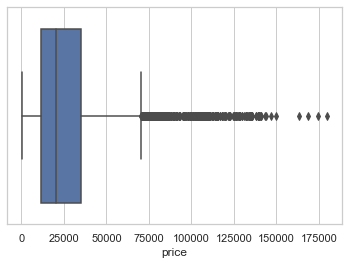

In [157]:
sns.boxplot(x= 'price' ,data=df);

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12135,2014,6,1997,2010,2015,2018,2022
price,12135,27472,23640,600,11250,20485,34900,179659
mileage_km,12135,121089,90637,1,47220,112219,178251,827190


In [160]:
df.loc[df.year < 2018].describe().T

,count,mean,std,min,25%,50%,75%,max
year,8830,2011,5,1997,2008,2012,2015,2017
price,8830,16938,10472,600,8750,15942,22500,168500
mileage_km,8830,156922,78580,4800,98484,144780,201574,827190


In [187]:
index_ = 1956
X_deneme = X.loc[[index_], : ]

print('Predictions',lasso_tuned.predict(X_deneme))

print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(df.loc[X_deneme.index].price, lasso_tuned.predict(X_deneme))))

Predictions [15451.46849602]
4- LASSO_Tunned test hata =  5456.468496023212


In [205]:
df.loc[df.model == 'X5'][:5]

,make,model,year,price,mileage_km,fuel_type
1854,BMW,X5,2003,4395,346460,Gasoline
1855,BMW,X5,2008,18950,199895,Gasoline
1864,BMW,X5,2002,10950,189884,Gasoline
1865,BMW,X5,2002,10950,214564,Gasoline
1879,BMW,X5,2014,23950,298312,Gasoline


# GBM 

In [228]:
from sklearn.ensemble import GradientBoostingRegressor

In [229]:
gbm_model =  GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [230]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6370.220589651521

In [234]:
gbm_params = {
            'learning_rate' :[0.01, 0.1],
            'max_depth': [50,100],
            'n_estimators': [20],
            'subsample': [1, 0.5],}

In [235]:
gbm = GradientBoostingRegressor()
gbm_cv_model =  GridSearchCV(gbm, gbm_params, cv=5, n_jobs=-1, verbose=2)
gbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [50, 100],
                         'n_estimators': [20], 'subsample': [1, 0.5]},
             verbose=2)

In [237]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 20, 'subsample': 0.5}

In [239]:
gbm_tuned = GradientBoostingRegressor()

In [240]:
gbm_tuned = GradientBoostingRegressor ( learning_rate= 0.1,
                                       max_depth= 50,
                                       n_estimators= 20,
                                       subsample= 0.5)

gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [241]:
y_pred =  gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5673.376072151228

In [243]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance of features')

<Figure size 2880x2880 with 0 Axes>

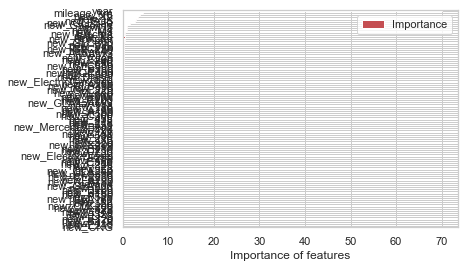

In [247]:
plt.figure(figsize=(40,40))
Importance.sort_values(by = 'Importance',
                      axis=0,
                      ascending= True).plot(kind ='barh', color='r')

plt.xlabel('Importance of features')

In [248]:
Importance.sort_values(by = 'Importance',
                      axis=0,
                      ascending= True).index

Index(['new_CNG', 'new_E240', 'new_418', 'new_B170', 'new_E320', 'new_LPG',
       'new_328', 'new_A170', 'new_523', 'new_ML320', 'new_CLK200', 'new_120',
       'new_X2', 'new_GLA180', 'new_525', 'new_A150', 'new_B160', 'new_B200',
       'new_220', 'new_GLA200', 'new_i4', 'new_CLA180', 'new_A200',
       'new_CLA200', 'new_316', 'new_CLA250', 'new_GLA250', 'new_Z3',
       'new_325', 'new_C220', 'new_C350', 'new_428', 'new_E250',
       'new_ElectricDiesel', 'new_730', 'new_C250', 'new_B250', 'new_318',
       'new_SLK200', 'new_320', 'new_iX3', 'new_216', 'new_535', 'new_B180',
       'new_X1', 'new_420', 'new_MercedesBenz', 'new_335', 'new_218',
       'new_225', 'new_435', 'new_C300', 'new_SL500', 'new_A180', 'new_A160',
       'new_C180', 'new_118', 'new_GLA45AMG', 'new_C200', 'new_E220',
       'new_BMW', 'new_330', 'new_ML350', 'new_GLC220', 'new_116',
       'new_CLS350', 'new_A250', 'new_ElectricGasoline', 'new_520',
       'new_Diesel', 'new_E300', 'new_EQC400', 'new_E350', 

In [249]:
df.loc[df.model == 'E240'].value_counts()

make          model  year  price  mileage_km  fuel_type
MercedesBenz  E240   2000  5500   129000      Gasoline     1
                     2004  5900   201444      Gasoline     1
                     2003  6350   250000      Gasoline     1
                           6950   182694      Gasoline     1
                           10900  117555      Gasoline     1
                           11945  126505      Gasoline     1
                     2004  4000   265553      Gasoline     1
                           4250   316000      Gasoline     1
                           4445   228616      Gasoline     1
                           5795   232870      Gasoline     1
                           6450   196159      LPG          1
                     2000  5950   131782      Gasoline     1
                     2004  6744   158891      Gasoline     1
                           6900   209118      Gasoline     1
                           7385   170302      Gasoline     1
                           79